<a href="https://colab.research.google.com/github/Slim205/ABM-prediction/blob/main/partie2_investor_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# exploration

In [ ]:
# This function computes a curve with a powerlaw exponent between xmin, xmax.
# you can shift on the vertical axis the curve with ymax parameter

def compute_powerlaw_curve(xmin,xmax,ymax,alpha):

    dx = np.linspace(xmin,xmax,100)

    y = dx**(-alpha)

    return dx,  ymax*y/y[0] #The output are the x and y ready for the plot


In [ ]:
df_investors = pd.read_csv('TEF_Investors.csv')
df_prices = pd.read_csv('TEF_Prices.csv')

In [ ]:
df_investors

,investor_id,date,position
0,18433,2000-01-03,0.0
1,18433,2000-01-04,0.0
2,18433,2000-01-05,0.0
3,18433,2000-01-07,0.0
4,18433,2000-01-10,0.0
...,...,...,...
900423,551,2007-10-10,2456.0
900424,551,2007-10-11,2456.0
900425,551,2007-10-12,2456.0
900426,551,2007-10-15,2456.0


Text(0.5, 1.0, 'TEF Close Price')

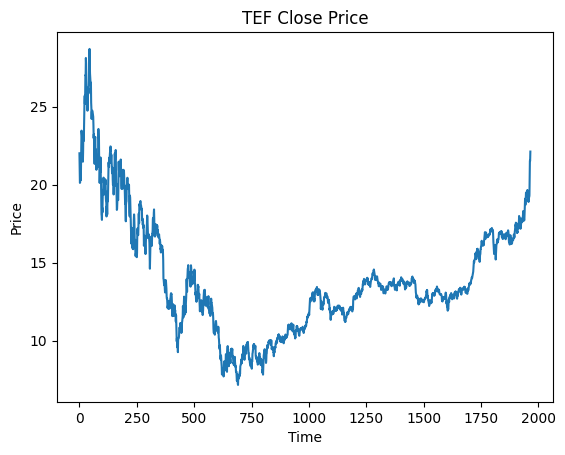

In [ ]:
p = df_prices['close'].values
plt.plot(p)
plt.ylabel('Price')
plt.xlabel('Time')
plt.title('TEF Close Price')

## Question3

In [ ]:
df_complet = pd.merge(df_investors, df_prices, on="date", how="outer")
df_complet = df_complet[df_complet['position'] != 0]
df_complet['adjusted_position'] = df_complet.groupby('investor_id')['position'].transform(lambda x: x.min())
df_complet['adjusted_position'] = df_complet.apply(lambda row: abs(row['adjusted_position']) + row['position'] if row['position'] < 0 else row['position'], axis=1)
df_complet['invested'] = df_complet['adjusted_position']*df_complet['close']
df_complet = df_complet[df_complet['adjusted_position'] != 0]

df_complet

,investor_id,date,position,id_price,close,open,max,min,volume,adjusted_position,invested
14,18350,2000-01-03,20000.0,1,22.01,22.76,23.05,21.83,15119907,20000.0,440200.00
21,18332,2000-01-03,-406.0,1,22.01,22.76,23.05,21.83,15119907,746.0,16419.46
23,18322,2000-01-03,120.0,1,22.01,22.76,23.05,21.83,15119907,120.0,2641.20
24,18321,2000-01-03,534.0,1,22.01,22.76,23.05,21.83,15119907,534.0,11753.34
25,18317,2000-01-03,-247.0,1,22.01,22.76,23.05,21.83,15119907,10067.0,221574.67
...,...,...,...,...,...,...,...,...,...,...,...
900398,2551,2007-10-16,600.0,1966,22.12,21.43,22.28,21.42,62472538,600.0,13272.00
900407,2343,2007-10-16,836.0,1966,22.12,21.43,22.28,21.42,62472538,836.0,18492.32
900416,2056,2007-10-16,676.0,1966,22.12,21.43,22.28,21.42,62472538,676.0,14953.12
900426,744,2007-10-16,10000.0,1966,22.12,21.43,22.28,21.42,62472538,10000.0,221200.00


In [ ]:
df_invested = df_complet.groupby(['investor_id']).sum()
money= df_invested['invested']

In [ ]:
import powerlaw as pl
ft = pl.Fit(abs(money))

Calculating best minimal value for power law fit


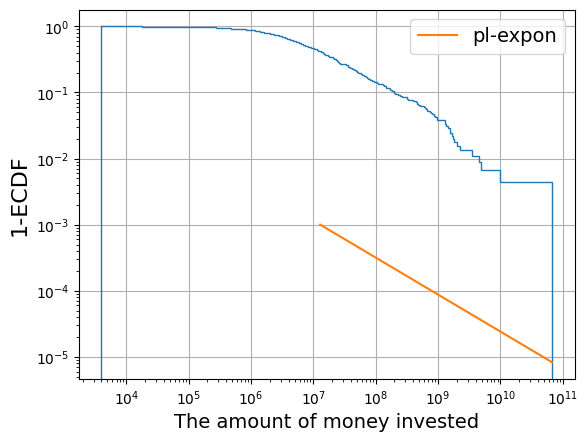

In [ ]:
# CDF can be binless, it is not useful having a bin lower than the observations
bn = sorted(set(abs(money)))


plt.hist(abs(money),bins=bn,density=True,cumulative=-1,histtype='step')

#Remember that the CDF has the esponent shifted by one
dx,dy = compute_powerlaw_curve(ft.xmin, max(abs(money)), 1e-3,  ft.alpha-1)
plt.plot(dx,dy,label='pl-expon')

#The xmin,xmax,ymax are manually tuned to have a comprehensible plot. Try to change them
#dx,dy = compute_powerlaw_curve(1e-2,max(abs(returns)),5,v-1)
#plt.plot(dx,dy,label='t-expon')
plt.yscale('log')
plt.xscale('log')
#plt.xlim(xmin=1e-3)
plt.xlabel('The amount of money invested',fontsize=14)
plt.ylabel('1-ECDF',fontsize=16)
plt.legend(loc='best',fontsize=14)
plt.grid()

In [ ]:
ft.alpha

1.5598132073695727

## Question 4

In [ ]:
import pandas as pd

# Reading the CSV files
df_investors = pd.read_csv('TEF_Investors.csv')

# Filter out the rows where the position is positive
df_investors = df_investors[df_investors['position'] > 0]

# Group by investor_id and count the number of positive positions
positive_position_counts = df_investors.groupby('investor_id').size()

# Assign the result to a new column in the original DataFrame
df_investors['positive_position_count'] = df_investors['investor_id'].map(positive_position_counts)

# Print the DataFrame with the positive position counts
df_investors



,investor_id,date,position,positive_position_count
182,18433,2000-09-19,2000.0,1223
183,18433,2000-09-20,3000.0,1223
184,18433,2000-09-21,3000.0,1223
185,18433,2000-09-22,3000.0,1223
186,18433,2000-09-25,3000.0,1223
...,...,...,...,...
900423,551,2007-10-10,2456.0,993
900424,551,2007-10-11,2456.0,993
900425,551,2007-10-12,2456.0,993
900426,551,2007-10-15,2456.0,993


In [ ]:
changed_pos =positive_position_counts.values
import powerlaw as pl
changed_pos=changed_pos[changed_pos!=0]
ft2 = pl.Fit(abs(changed_pos))

Calculating best minimal value for power law fit


In [ ]:
ft2.alpha

2.362306836905565

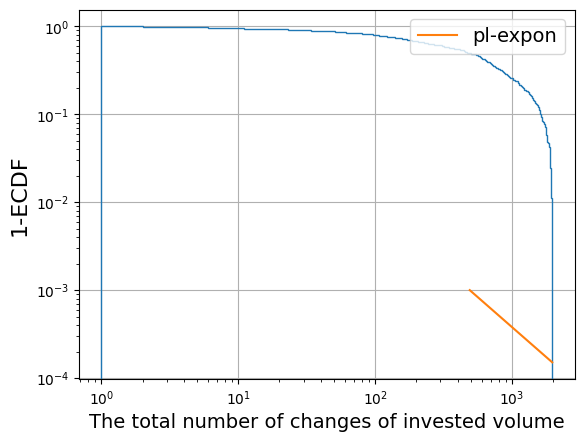

In [ ]:
bn = sorted(set(abs(changed_pos)))


plt.hist(abs(changed_pos),bins=bn,density=True,cumulative=-1,histtype='step')

#Remember that the CDF has the esponent shifted by one
dx,dy = compute_powerlaw_curve(ft2.xmin, max(abs(changed_pos)), 1e-3,  ft2.alpha-1)
plt.plot(dx,dy,label='pl-expon')


plt.yscale('log')
plt.xscale('log')
#plt.xlim(xmin=1e-3)
plt.xlabel('The total number of changes of invested volume',fontsize=14)
plt.ylabel('1-ECDF',fontsize=16)
plt.legend(loc='best',fontsize=14)
plt.grid()

# The influence of past price returns

## Question 1

In [ ]:
investors = pd.read_csv('TEF_Investors.csv')
prices = pd.read_csv('TEF_Prices.csv')
prices = pd.read_csv('TEF_Prices.csv', index_col='date')
retours = prices['close']
retours = retours.diff().iloc[1:]

In [ ]:
df_comp = pd.merge(investors, retours, on="date", how="outer")
df_comp = df_comp.dropna()
df_comp

,investor_id,date,position,close
458,18433,2000-01-04,0.0,-0.91
459,18428,2000-01-04,0.0,-0.91
460,18427,2000-01-04,0.0,-0.91
461,18425,2000-01-04,0.0,-0.91
462,18417,2000-01-04,0.0,-0.91
...,...,...,...,...
900423,1309,2007-10-16,0.0,0.61
900424,1041,2007-10-16,0.0,0.61
900425,886,2007-10-16,-455120.0,0.61
900426,744,2007-10-16,10000.0,0.61


In [ ]:
df_sigma = df_comp[['investor_id', 'position']]
df_sigma = df_sigma[df_sigma['position']!= 0]
df_sigma = df_sigma.groupby(['investor_id']).count()
df_sigma
df_sigma = df_sigma[df_sigma['position']> 20]
df_sigma['sig_av'] = (df_sigma['position']-3)**(-1/2)
df_sigma['sig'] = np.tanh(1.96*df_sigma['sig_av'])

df_sigma

,position,sig_av,sig
investor_id,,,
551,993,0.031782,0.062212
744,1236,0.028479,0.055760
886,1965,0.022576,0.044220
1041,888,0.033615,0.065790
1309,117,0.093659,0.181536
...,...,...,...
18417,1920,0.022840,0.044736
18425,1957,0.022622,0.044311
18427,1940,0.022721,0.044505


In [ ]:
df_corr = df_comp[['investor_id', 'position', 'close']]
df_corr = df_corr.loc[df_corr['position'] != 0]
df_corr = df_corr.groupby(['investor_id']).corr()
df_corr

position     close
investor_id                             
551         position  1.000000 -0.005803
            close    -0.005803  1.000000
744         position  1.000000  0.046636
            close     0.046636  1.000000
886         position  1.000000 -0.064155
...                        ...       ...
18427       close    -0.047299  1.000000
18428       position  1.000000 -0.031355
            close    -0.031355  1.000000
18433       position  1.000000 -0.022339
            close    -0.022339  1.000000

[904 rows x 2 columns]

In [ ]:
df1 = df_corr.loc[(slice(None), 'close'),'position']

df1 = df1.groupby('investor_id').sum()
df1 = df1.reset_index()


df_type=pd.merge(df1, df_sigma, on="investor_id", how="outer")

df_type.rename(columns={'position_x': 'corr'}, inplace=True)
df_type.rename(columns={'position_y': 'position'}, inplace=True)
df_type
def get_type(row):
    if row['corr'] > row['sig']:
        return 'trend'
    elif row['corr'] < -row['sig']:
        return 'contrarian'
    else:
        return 'neutre'
df_type['type'] = df_type.apply(lambda row: get_type(row), axis=1)
df_type = df_type.dropna()

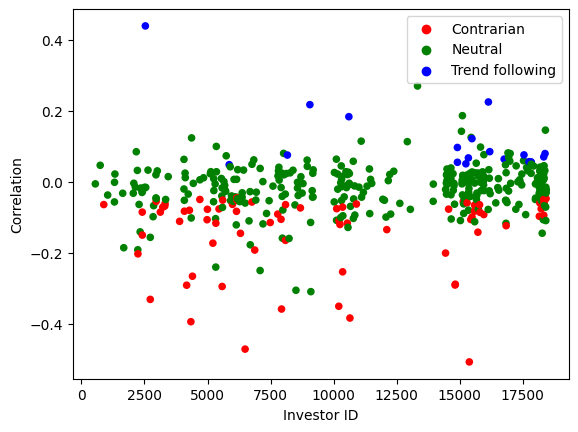

In [ ]:
colors = ['red' if c == 'contrarian' else 'blue' if c=='trend' else 'green' for c in df_type['type']]

# Assign colors based on correlation values

ax = df_type.plot(kind='scatter', x='investor_id', y='corr', c=colors)

# Set x-label and y-label
ax.set_xlabel('Investor ID')
ax.set_ylabel('Correlation')

# Create legend
legend_labels = ['Contrarian', 'Neutral', 'Trend following']
legend_colors = ['red', 'green','blue']  # Colors for the legend

# Plot invisible points for the legend
for color, label in zip(legend_colors, legend_labels):
    ax.scatter([], [], c=color, label=label)

# Display legend
ax.legend()

plt.show()


In [ ]:
counts = df_type['type'].value_counts()
# Accéder aux valeurs individuelles
neutre_count = counts['neutre']
trend_count = counts['trend']
contrarian_count = counts['contrarian']

# Afficher les résultats
print("Neutre :", neutre_count)
print("Trend :", trend_count)
print("Contrarian :", contrarian_count)

Neutre : 359
Trend : 20
Contrarian : 73


In [ ]:
df1 = df_corr.loc[(slice(None), 'close'),:]
df1 = df1['position']

## Question 2

In [ ]:
date_split = '2004-01-01'

df_comp['date'] = pd.to_datetime(df_comp['date'])

df1,df2 = df_comp.loc[df_comp['date'] < date_split],df_comp.loc[df_comp['date'] >= date_split]


df_corr1 ,df_corr2 = df1[['investor_id', 'position', 'close']],df2[['investor_id', 'position', 'close']]

df_corr1,df_corr2  = df_corr1.loc[df_corr1['position'] != 0] ,df_corr2.loc[df_corr2['position'] != 0]
df_corr1 ,df_corr2 = df_corr1.groupby(['investor_id']).corr(),df_corr2.groupby(['investor_id']).corr()

df_c1 = df_corr1.loc[(slice(None), 'close'),:]['position']
df_c2 = df_corr2.loc[(slice(None), 'close'),:]['position']


df = pd.merge(df_c1, df_c2, on="investor_id", how="outer")
df = df.fillna(0)
df_sigma
df=pd.merge(df,df_sigma,on="investor_id", how="outer")
df = df.rename(columns = {'position_x' : 'before', 'position_y' : 'after'})

In [ ]:
def type(x) :
    if (x['before'] < -x['sig']) and (x['after'] >= -x['sig'] ) and (x['after']<= x['sig']):
        return 'c-n'
    elif (x['before'] < -x['sig']) and (x['after'] > x['sig']) :
        return 'c-t'
    elif (x['before'] >= -x['sig'] ) and (x['before']<= x['sig']) and (x['after'] < -x['sig']) :
        return 'n-c'
    elif (x['before'] >= -x['sig'] ) and (x['before']<= x['sig']) and (x['after'] > x['sig']) :
        return 'n-t'
    elif (x['before'] > x['sig']) and (x['after'] >= -x['sig'] ) and (x['after']<= x['sig']) :
        return 't-n'
    elif (x['before'] > x['sig']) and (x['after'] < -x['sig']) :
        return 't-c'
    elif (x['before'] > x['sig']) and (x['after'] > x['sig']) :
        return 't-t'
    elif (x['before'] < -x['sig']) and (x['after'] < -x['sig']) :
        return 'c-c'
    else :
        return 'n-n'

table_transi = df.assign(strat=df.apply(type, axis=1))
table_transi = table_transi.groupby(['strat'])['strat'].count()
table_transi.div(table_transi.sum())

strat
c-c    0.024336
c-n    0.159292
c-t    0.006637
n-c    0.103982
n-n    0.630531
n-t    0.042035
t-c    0.002212
t-n    0.026549
t-t    0.004425
Name: strat, dtype: float64

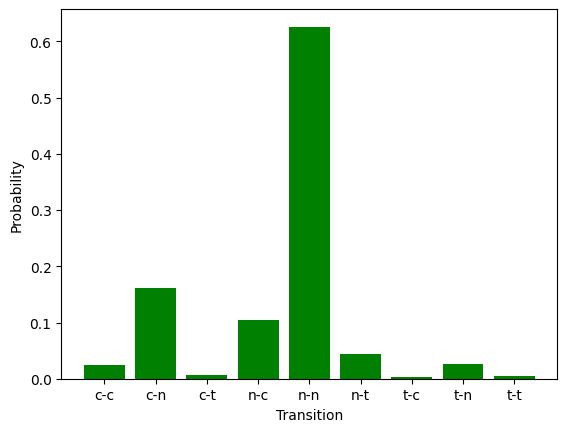

In [ ]:
import matplotlib.pyplot as plt

categories = ['c-c', 'c-n', 'c-t', 'n-c', 'n-n', 'n-t', 't-c', 't-n', 't-t']
values = [0.024336, 0.161504, 0.006637, 0.103982, 0.626106, 0.044248, 0.002212, 0.026549, 0.004425]

plt.bar(categories, values, color='green')

plt.xlabel('Transition')
plt.ylabel('Probability')
#plt.title('Translation of Values')

plt.show()


## Question 3

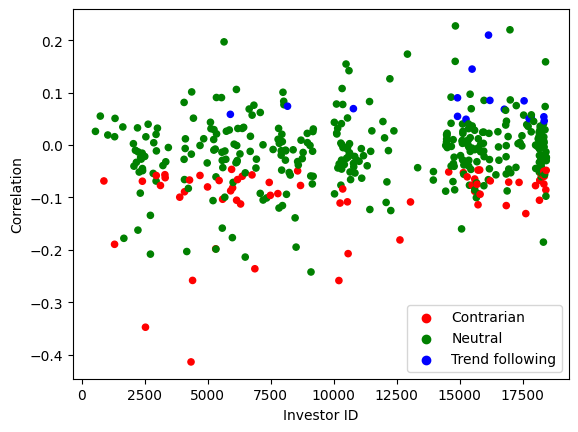

Neutre : 342
Trend : 17
Contrarian : 65


In [ ]:
retours1 = retours.copy()
retours1 = retours1.shift(1)[1:]


df_comp1 = pd.merge(investors, retours1, on="date", how="outer").dropna()


df_corr1 =df_comp1[['investor_id', 'position', 'close']]
df_corr1=df_corr1.loc[df_corr1['position'] != 0]
df_corr1 = df_corr1.groupby(['investor_id']).corr()
df1 = df_corr1.loc[(slice(None), 'close'),'position']

df1 = df1.groupby('investor_id').sum()
df1 = df1.reset_index()

df_sigma = df_comp1[['investor_id', 'position']]
df_sigma = df_sigma[df_sigma['position']!= 0]
df_sigma = df_sigma.groupby(['investor_id']).count()
df_sigma
df_sigma = df_sigma[df_sigma['position']> 20]
df_sigma['sig_av'] = (df_sigma['position']-3)**(-1/2)
df_sigma['sig'] = np.tanh(1.96*df_sigma['sig_av'])

df_sigma
df_type=pd.merge(df1, df_sigma, on="investor_id", how="outer")

df_type.rename(columns={'position_x': 'corr'}, inplace=True)
df_type.rename(columns={'position_y': 'position'}, inplace=True)
df_type = df_type.dropna()
def get_type(row):
    if row['corr'] > row['sig']:
        return 'trend'
    elif row['corr'] < -row['sig']:
        return 'contrarian'
    else:
        return 'neutre'
df_type['type'] = df_type.apply(lambda row: get_type(row), axis=1)
df_type
counts = df_type['type'].value_counts()
# Accéder aux valeurs individuelles
neutre_count = counts['neutre']
trend_count = counts['trend']
contrarian_count = counts['contrarian']

colors = ['red' if c == 'contrarian' else 'blue' if c=='trend' else 'green' for c in df_type['type']]

# Assign colors based on correlation values

ax = df_type.plot(kind='scatter', x='investor_id', y='corr', c=colors)

# Set x-label and y-label
ax.set_xlabel('Investor ID')
ax.set_ylabel('Correlation')

# Create legend
legend_labels = ['Contrarian', 'Neutral', 'Trend following']
legend_colors = ['red', 'green','blue']  # Colors for the legend

# Plot invisible points for the legend
for color, label in zip(legend_colors, legend_labels):
    ax.scatter([], [], c=color, label=label)

# Display legend
ax.legend()

plt.show()

# Afficher les résultats
print("Neutre :", neutre_count)
print("Trend :", trend_count)
print("Contrarian :", contrarian_count)

#  Investor behaviour: the influence of past price returns part 2

## une période

In [ ]:
from math import tanh

In [ ]:
prices = pd.read_csv('TEF_Prices.csv', index_col='date')
price = prices[['close']]

def serie(data, k, beta,lam, alpha) :
    df = data.copy()
    df.loc['2000-01-03', 'm_t'] = df.loc['2000-01-03', 'close'] * alpha
    df.loc['2000-01-03', 'v_t'] = df.loc['2000-01-03', 'close'] * lam
    df.loc['2000-01-03', f'k_{k}'] = k * (df.loc['2000-01-03', 'v_t'] - df.loc['2000-01-03', 'close'])
    df.loc['2000-01-03', f'beta_{beta}'] = beta* tanh(df.loc['2000-01-03', 'm_t'])
    for i in range(1, len(df)):
        l_index = df.index.values.tolist()
        df.loc[l_index[i], 'm_t'] = (1-alpha) * df.loc[l_index[i-1], 'm_t']  + alpha * (df.loc[l_index[i], 'close'] - df.loc[l_index[i-1], 'close'])
        df.loc[l_index[i], 'v_t'] = (1-lam) * df.loc[l_index[i-1], 'v_t']  + lam * df.loc[l_index[i], 'close']
        df.loc[l_index[i], f'k_{k}'] = k * (df.loc[l_index[i], 'v_t'] - df.loc[l_index[i], 'close'])
        df.loc[l_index[i], f'beta_{beta}'] = beta* tanh(df.loc[l_index[i], 'm_t'])
    return df
def calcul(dataa, l_k, l_beta,lam=0.025, alpha=0.125) :
    df = dataa.copy()
    for i in range(len(l_k)) :
        df = serie(df, l_k[i], l_beta[i], lam,alpha)
    return df
price


,close
date,
2000-01-03,22.01
2000-01-04,21.10
2000-01-05,20.11
2000-01-07,20.15
2000-01-10,20.76
...,...
2007-10-10,19.32
2007-10-11,20.67
2007-10-12,21.54


In [ ]:
l_k1 = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]
l_beta1 = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]

l_n1 = [f'beta_{l_beta1[i]}' for i in range(len(l_beta1))] + [f'k_{l_k1[i]}' for i in range(len(l_k1))]

data = calcul(price, l_k1, l_beta1)
data = data.drop(['m_t', 'v_t'], axis=1)

In [ ]:
data_comp = pd.merge(df_investors, data, on="date", how="outer")
data_comp = data_comp.dropna()
data_comp = data_comp.loc[data_comp['position'] != 0]
data_comp = data_comp[['investor_id', 'position'] + [n for n in l_n1]]
data_comp
df_corr_maj = data_comp.groupby(['investor_id']).corr()
data1 = df_corr_maj.loc[(slice(None), 'position'),:]
data1 = data1[[n for n in l_n1]]


Text(0.5, 1.0, 'the histogram of the frequency')

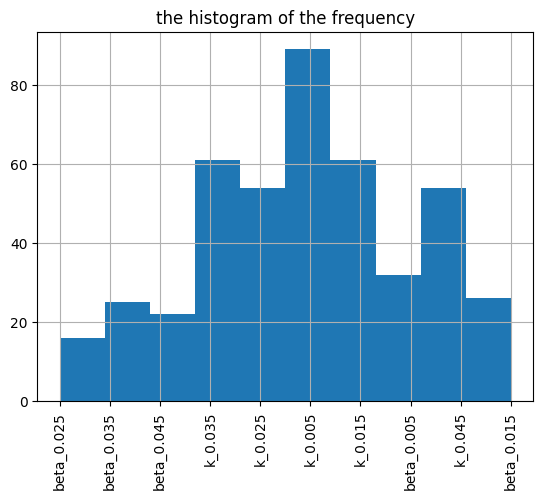

In [ ]:
maxfrequency = data1.abs().idxmax(axis = 1)
maxfrequency.hist()
plt.xticks(rotation=90)
plt.title('the histogram of the frequency')

In [ ]:
from math import tanh

## deux périodes

In [ ]:
prices = pd.read_csv('TEF_Prices.csv')
price = prices[['date','close']]

def serie1(data, k,beta, lam, alpha) :
    df = data.copy()
    df.loc['2000-01-03', 'm_t'] = df.loc['2000-01-03', 'close'] * alpha
    df.loc['2000-01-03', 'v_t'] = df.loc['2000-01-03', 'close'] * lam
    df.loc['2000-01-03', f'k_{k}'] = k * (df.loc['2000-01-03', 'v_t'] - df.loc['2000-01-03', 'close'])
    df.loc['2000-01-03', f'beta_{beta}'] = beta*tanh(df.loc['2000-01-03', 'm_t'])
    for i in range(1, len(df)):
        l_index = df.index.values.tolist()
        df.loc[l_index[i], 'm_t'] = (1-alpha) * df.loc[l_index[i-1], 'm_t']  + alpha * (df.loc[l_index[i], 'close'] - df.loc[l_index[i-1], 'close'])
        df.loc[l_index[i], 'v_t'] = (1-lam) * df.loc[l_index[i-1], 'v_t']  + lam * df.loc[l_index[i], 'close']
        df.loc[l_index[i], f'k_{k}'] = k * (df.loc[l_index[i], 'v_t'] - df.loc[l_index[i], 'close'])
        df.loc[l_index[i], f'beta_{beta}'] = beta*tanh(df.loc[l_index[i], 'm_t'])
    return df
def serie2(data, k, beta,lam, alpha) :
    df = data.copy()
    df.loc['2004-01-02', 'm_t'] = df.loc['2004-01-02', 'close'] * alpha
    df.loc['2004-01-02', 'v_t'] = df.loc['2004-01-02', 'close'] * lam
    df.loc['2004-01-02', f'k_{k}'] = k * (df.loc['2004-01-02', 'v_t'] - df.loc['2004-01-02', 'close'])
    df.loc['2004-01-02', f'beta_{beta}'] = beta* tanh(df.loc['2004-01-02', 'm_t'])
    for i in range(1, len(df)):
        l_index = df.index.values.tolist()
        df.loc[l_index[i], 'm_t'] = (1-alpha) * df.loc[l_index[i-1], 'm_t']  + alpha * (df.loc[l_index[i], 'close'] - df.loc[l_index[i-1], 'close'])
        df.loc[l_index[i], 'v_t'] = (1-lam) * df.loc[l_index[i-1], 'v_t']  + lam * df.loc[l_index[i], 'close']
        df.loc[l_index[i], f'k_{k}'] = k * (df.loc[l_index[i], 'v_t'] - df.loc[l_index[i], 'close'])
        df.loc[l_index[i], f'beta_{beta}'] = beta*tanh(df.loc[l_index[i], 'm_t'])
    return df
price

,date,close
0,2000-01-03,22.01
1,2000-01-04,21.10
2,2000-01-05,20.11
3,2000-01-07,20.15
4,2000-01-10,20.76
...,...,...
1961,2007-10-10,19.32
1962,2007-10-11,20.67
1963,2007-10-12,21.54
1964,2007-10-15,21.51


In [ ]:
def calcul1(dataframe,l_k, l_beta,lam=0.25, alpha=0.125) :
    df = dataframe.copy()
    for i in range(len(l_k)) :
        df = serie1(df, l_k[i], l_beta[i], lam,alpha)
    return df
def calcul2(dataframe,l_k, l_beta,lam=0.25, alpha=0.125) :
    df = dataframe.copy()
    for i in range(len(l_k)) :
        df = serie2(df, l_k[i], l_beta[i], lam,alpha)
    return df

In [ ]:
date_split = '2004-01-01'


prices1,prices2=df_prices.loc[df_prices['date'] < date_split],df_prices.loc[df_prices['date'] >= date_split]
prices1_t,prices2_t=prices1[['close','date']],prices2[['close','date']]

l_k = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]
l_beta = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]

l_n = [f'beta_{l_beta[i]}' for i in range(len(l_k))] + [f'k_{l_k[i]}' for i in range(len(l_k))]

prices1_t = prices1_t.set_index('date')

prices2_t = prices2_t.set_index('date')
prices2_t

,close
date,
2004-01-02,12.00
2004-01-05,12.19
2004-01-07,12.47
2004-01-08,12.71
2004-01-09,12.50
...,...
2007-10-10,19.32
2007-10-11,20.67
2007-10-12,21.54


In [ ]:
investors = pd.read_csv('TEF_Investors.csv')
data1 = calcul1(prices1_t,l_k, l_beta)
data1 = data1.drop(['m_t', 'v_t'], axis=1)
data2 = calcul2(prices2_t, l_k, l_beta)
data2 = data2.drop(['m_t', 'v_t'], axis=1)
###1
data_comp1 = pd.merge(investors, data1, on="date", how="outer")
data_comp1 = data_comp1.dropna()
data_comp1 = data_comp1.loc[data_comp1['position'] != 0]
data_comp1 = data_comp1[['investor_id', 'position'] + [n for n in l_n]]

data_corr_maj1 = data_comp1.groupby(['investor_id']).corr()
data1_maj1 = data_corr_maj1.loc[(slice(None), 'position'),:]
data1_maj1 = data1_maj1[[n for n in l_n]]
data1_maj1
###2
data_comp2 = pd.merge(investors, data2, on="date", how="outer")
data_comp2 = data_comp2.dropna()
data_comp2 = data_comp2.loc[data_comp2['position'] != 0]
data_comp2 = data_comp2[['investor_id', 'position'] + [n for n in l_n]]

data_corr_maj2 = data_comp2.groupby(['investor_id']).corr()
data1_maj2 = data_corr_maj2.loc[(slice(None), 'position'),:]
data1_maj2 = data1_maj2[[n for n in l_n]]
data1_maj2

,,beta_0.005,beta_0.01,beta_0.015,beta_0.02,beta_0.025,beta_0.03,beta_0.035,beta_0.04,beta_0.045,beta_0.05,k_0.005,k_0.01,k_0.015,k_0.02,k_0.025,k_0.03,k_0.035,k_0.04,k_0.045,k_0.05
investor_id,,,,,,,,,,,,,,,,,,,,,
551,position,0.112925,0.112925,0.112925,0.112925,0.112925,0.112925,0.112925,0.112925,0.112925,0.112925,-0.081021,-0.081021,-0.081021,-0.081021,-0.081021,-0.081021,-0.081021,-0.081021,-0.081021,-0.081021
744,position,-0.096310,-0.096310,-0.096310,-0.096310,-0.096310,-0.096310,-0.096310,-0.096310,-0.096310,-0.096310,0.073754,0.073754,0.073754,0.073754,0.073754,0.073754,0.073754,0.073754,0.073754,0.073754
886,position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,position,0.136419,0.136419,0.136419,0.136419,0.136419,0.136419,0.136419,0.136419,0.136419,0.136419,0.023774,0.023774,0.023774,0.023774,0.023774,0.023774,0.023774,0.023774,0.023774,0.023774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18417,position,-0.058894,-0.058894,-0.058894,-0.058894,-0.058894,-0.058894,-0.058894,-0.058894,-0.058894,-0.058894,0.028074,0.028074,0.028074,0.028074,0.028074,0.028074,0.028074,0.028074,0.028074,0.028074
18425,position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18427,position,-0.121569,-0.121569,-0.121569,-0.121569,-0.121569,-0.121569,-0.121569,-0.121569,-0.121569,-0.121569,0.076791,0.076791,0.076791,0.076791,0.076791,0.076791,0.076791,0.076791,0.076791,0.076791


Text(0.5, 1.0, 'the histogram of the frequency for the first period')

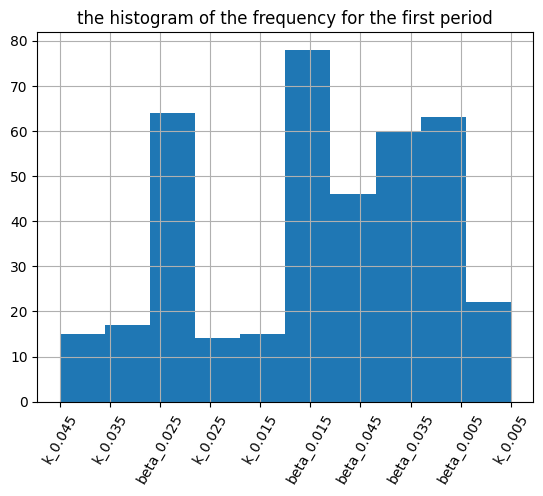

In [ ]:
maxfrequency1 = data1_maj1.abs().idxmax(axis = 1)
maxfrequency1.hist()
plt.xticks(rotation=60)
plt.title('the histogram of the frequency for the first period')

Text(0.5, 1.0, 'the histogram of the frequency for the second period')

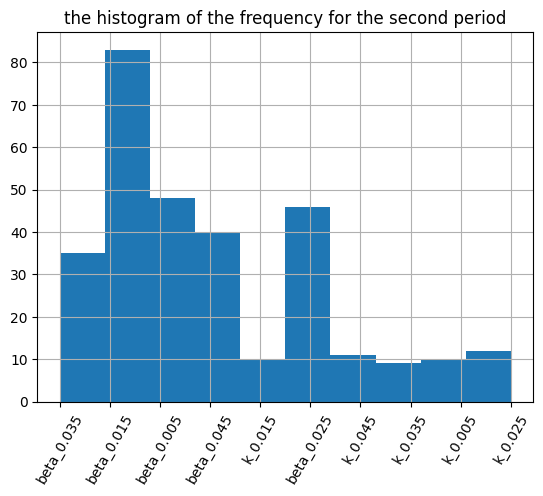

In [ ]:
maxfrequency2 = data1_maj2.abs().idxmax(axis = 1)
maxfrequency2.hist()
plt.xticks(rotation=60)
plt.title('the histogram of the frequency for the second period')